In [1]:
import pandas as pd #loading Dataset
Data = pd.read_excel(r"Data_Train.xlsx")
Data['Destination'] = Data['Destination'].replace('Delhi', 'New Delhi')
Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,New Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [2]:
Data.shape

(10683, 11)

In [3]:
Data['Airline'].unique()
# Data.isnull().sum()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

Cleaning of Data

In [4]:
# Data["Additional_Info"].value_counts()

In [5]:
dtypes = []
uniquevalues = []
numUni = []
frequency = []
numnull = []

for i in Data:
    dtypes.append(Data[i].dtype)
    uniquevalues.append(Data[i].unique())
    numUni.append(Data[i].nunique())
    frequency.append(Data[i].value_counts().to_dict())
    numnull.append(Data[i].isnull().sum())
Data_About = pd.DataFrame({"Features": Data.columns, "dtype":dtypes, "unique values" : uniquevalues, "count of unique" : numUni,"frequency":frequency,"count of null":numnull})
Data_About

,Features,dtype,unique values,count of unique,frequency,count of null
0,Airline,object,"[IndiGo, Air India, Jet Airways, SpiceJet, Mul...",12,"{'Jet Airways': 3849, 'IndiGo': 2053, 'Air Ind...",0
1,Date_of_Journey,object,"[24/03/2019, 1/05/2019, 9/06/2019, 12/05/2019,...",44,"{'18/05/2019': 504, '6/06/2019': 503, '21/05/2...",0
2,Source,object,"[Banglore, Kolkata, Delhi, Chennai, Mumbai]",5,"{'Delhi': 4537, 'Kolkata': 2871, 'Banglore': 2...",0
3,Destination,object,"[New Delhi, Banglore, Cochin, Kolkata, Hyderabad]",5,"{'Cochin': 4537, 'Banglore': 2871, 'New Delhi'...",0
4,Route,object,"[BLR → DEL, CCU → IXR → BBI → BLR, DEL → LKO →...",128,"{'DEL → BOM → COK': 2376, 'BLR → DEL': 1552, '...",1
5,Dep_Time,object,"[22:20, 05:50, 09:25, 18:05, 16:50, 09:00, 18:...",222,"{'18:55': 233, '17:00': 227, '07:05': 205, '10...",0
6,Arrival_Time,object,"[01:10 22 Mar, 13:15, 04:25 10 Jun, 23:30, 21:...",1343,"{'19:00': 423, '21:00': 360, '19:15': 333, '16...",0
7,Duration,object,"[2h 50m, 7h 25m, 19h, 5h 25m, 4h 45m, 2h 25m, ...",368,"{'2h 50m': 550, '1h 30m': 386, '2h 45m': 337, ...",0
8,Total_Stops,object,"[non-stop, 2 stops, 1 stop, 3 stops, nan, 4 st...",5,"{'1 stop': 5625, 'non-stop': 3491, '2 stops': ...",1
9,Additional_Info,object,"[No info, In-flight meal not included, No chec...",10,"{'No info': 8345, 'In-flight meal not included...",0


In [6]:
Data_df = Data.drop(["Route","Additional_Info"],axis = 1) # difficult to chang to numerical and this information is redundant
Data_df = Data_df.dropna(axis = 0)

In [7]:
Data_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [8]:
Data_df["Journey_day"] = pd.to_datetime(Data_df.Date_of_Journey,format = "%d/%m/%Y").dt.day
Data_df["Journey_month"] = pd.to_datetime(Data_df.Date_of_Journey, format = "%d/%m/%Y").dt.month    

In [9]:
Data_df["dep_hour"] = pd.to_datetime(Data_df.Dep_Time).dt.hour
Data_df["dep_min"] = pd.to_datetime(Data_df.Dep_Time).dt.minute
Data_df["dep_time_hour"] = Data_df["dep_hour"]+(Data_df["dep_min"]/60)
Data_df.drop(["dep_hour","dep_min","Dep_Time","Date_of_Journey"], axis = 1,inplace = True)

In [10]:
Data_df["arr_hour"] = pd.to_datetime(Data_df.Arrival_Time).dt.hour
Data_df["arr_min"] = pd.to_datetime(Data_df.Arrival_Time).dt.minute
Data_df["arr_time_hour"] = Data_df["arr_hour"]+(Data_df["arr_min"]/60)
Data_df.drop(["arr_hour","arr_min","Arrival_Time"],axis = 1, inplace = True)

In [11]:
Data_df

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,dep_time_hour,arr_time_hour
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22.333333,1.166667
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5.833333,13.250000
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9.416667,4.416667
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18.083333,23.500000
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16.833333,21.583333
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,9,4,19.916667,22.416667
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,27,4,20.750000,23.333333
10680,Jet Airways,Banglore,New Delhi,3h,non-stop,7229,27,4,8.333333,11.333333
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,1,3,11.500000,14.166667


In [12]:
dur = []
for i in Data_df["Duration"]:
    i = i.replace("h","")
    i = i.replace("m","")
    ls = i.split(" ")
    if len(ls)==2:
        dur.append(int(ls[0])+(int(ls[1])/60))
    elif len(ls)==1:
        dur.append(int(ls[0]))
Data_df["Duration_hour"] = dur
Data_df.drop(["Duration"],axis = 1, inplace = True)

In [13]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
Data_df["Total_Stops"] = Data_df["Total_Stops"].map(stops)

In [14]:
Data_dfS = pd.get_dummies(Data_df["Source"], prefix="S")
Data_dfD = pd.get_dummies(Data_df["Destination"], prefix = "D")
Data_dfA = pd.get_dummies(Data_df["Airline"],prefix = "A")
Data_df = pd.concat([Data_df,Data_dfS,Data_dfD,Data_dfA], axis = 1)
Data_df.drop(["Source","Destination","Airline"], axis = 1, inplace = True )

In [15]:
Data_df

,Total_Stops,Price,Journey_day,Journey_month,dep_time_hour,arr_time_hour,Duration_hour,S_Banglore,S_Chennai,S_Delhi,...,A_GoAir,A_IndiGo,A_Jet Airways,A_Jet Airways Business,A_Multiple carriers,A_Multiple carriers Premium economy,A_SpiceJet,A_Trujet,A_Vistara,A_Vistara Premium economy
0,0,3897,24,3,22.333333,1.166667,2.833333,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,5.833333,13.250000,7.416667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,9.416667,4.416667,19.000000,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,18.083333,23.500000,5.416667,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,16.833333,21.583333,4.750000,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19.916667,22.416667,2.500000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10679,0,4145,27,4,20.750000,23.333333,2.583333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10680,0,7229,27,4,8.333333,11.333333,3.000000,1,0,0,...,0,0,1,0,0,0,0,0,0,0
10681,0,12648,1,3,11.500000,14.166667,2.666667,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
Data_df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [17]:
X = Data_df.drop(["Price"], axis =1)
y = Data_df["Price"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state = 3)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
LR = LinearRegression()
LR = LR.fit(X_train,y_train)
pred = LR.predict(X_test)
r2_score(y_test,pred)

0.575322513629808

In [18]:
# X

In [89]:
X = Data_df.drop(["Price"], axis =1)
y = Data_df["Price"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state = 3)

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
LR = Ridge(alpha = 0.1)
LR = LR.fit(X_train,y_train)
pred = LR.predict(X_test)
r2_score(y_test,pred)

0.5753583474302625

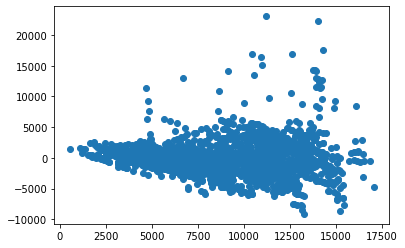

In [90]:
y_test = y_test.to_list()
residual = (y_test - pred)
import matplotlib.pyplot as plt   # checking for linearity
plt.scatter(pred,residual)
plt.show()

In [20]:
# from statsmodels.compat import lzip
# import statsmodels.stats.api as sms

# #perform Bresuch-Pagan test
# names = ['Lagrange multiplier statistic', 'p-value',
#         'f-value', 'f p-value']
# test = sms.het_breuschpagan(pred.resid, pred.model.exog)

# lzip(names, test)


In [21]:
X = Data_df[["Duration_hour"]]
y = Data_df["Price"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state = 3)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
LR = LinearRegression()
LR = LR.fit(X_train,y_train)
pred = LR.predict(X_test)
r2_score(y_test,pred)

0.29399811447314983

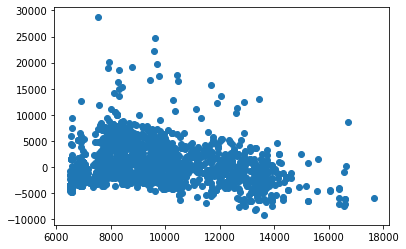

In [22]:
y_test = y_test.to_list()
residual = (y_test - pred)
import matplotlib.pyplot as plt   # checking for linearity # if there is no pattern then linearity is satisfied
plt.scatter(pred,residual)
plt.show()

Optimal number of features : 27


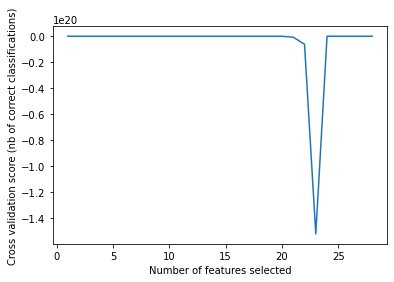

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
X = Data_df.drop(["Price"], axis =1)
y = Data_df["Price"]


rfecv = RFECV(estimator=lreg, step=1,
              scoring='r2')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [24]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [25]:
# pip install statsmodels

In [26]:
type(X_train)

pandas.core.frame.DataFrame

In [27]:
X = Data_df.drop(["Price","Duration_hour","A_Multiple carriers","A_Multiple carriers Premium economy","A_Vistara Premium economy"], axis =1)
y = Data_df["Price"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state = 3)

y_train = pd.DataFrame(y_train)

import statsmodels.api as sm
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     812.8
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:58:54   Log-Likelihood:                -80174.
No. Observations:                8545   AIC:                         1.604e+05
Df Residuals:                    8527   BIC:                         1.605e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Total_Stops             3048.0291     67.148     45.392      0.000    2916.402    3179.656
Journey_day              -77.1545      3.713    -20.780      0.000     -84.433     -69.876
Journey_month           -594.3198     27.975    -21.245      0.000    -649.158    -539.482
dep_time_hour             24.7461      5.577      4.437      0.000      13.814      35.678
arr_time_hour            -10.3744      4.646     -2.233      0.026     -19.482      -1.267
S_Banglore              5954.3912    102.069     58.337      0.000    5754.312    6154.470
S_Chennai               5950.0817    133.878     44.444      0.000    5687.648    6212.516
S_Delhi                 5770.5396    108.368     53.250      0.000    5558.112    5982.967
S_Kolkata               5798.2581    112.955     51.332      0.000    5576.839    6019.677
S_Mumbai                5033.3676    116.661     43.145      0.000    4804.683    5262.052
D_Banglore              5798.2581    112.955     51.332      0.000    5576.839    6019.677
D_Cochin                5770.5396    108.368     53.250      0.000    5558.112    5982.967
D_Hyderabad             5033.3676    116.661     43.145      0.000    4804.683    5262.052
D_Kolkata               5950.0817    133.878     44.444      0.000    5687.648    6212.516
D_New Delhi             5954.3912    102.069     58.337      0.000    5754.312    6154.470
A_Air Asia             -3842.1800    210.338    -18.267      0.000   -4254.494   -3429.866
A_Air India            -2139.6383    132.910    -16.098      0.000   -2400.175   -1879.102
A_GoAir                -3871.7176    251.724    -15.381      0.000   -4365.158   -3378.277
A_IndiGo               -3529.0417    128.223    -27.523      0.000   -3780.391   -3277.693
A_Jet Airways            738.2398    117.892      6.262      0.000     507.143     969.337
A_Jet Airways Business  4.428e+04   1182.546     37.446      0.000     4.2e+04    4.66e+04
A_SpiceJet             -4045.8167    162.894    -24.837      0.000   -4365.129   -3726.504
A_Trujet                        0          0        nan        nan           0           0
A_Vistara              -1669.1391    184.804     -9.032      0.000   -2031.400   -1306.879
==============================================================================
Omnibus:                     4950.683   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           166987.334
Skew:                           2.201   Prob(JB):                         0.00
Kurtosis:                      24.204   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might in

In [28]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
                                          # homoscedasticity check, p>0.05
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 460.8859881722824),
 ('p-value', 4.692780297779072e-83),
 ('f-value', 28.596205983845937),
 ('f p-value', 8.287532885337911e-90)]

In [29]:
residuals = y_test - pred

(array([ 41., 826., 784., 351.,  98.,  18.,   9.,   7.,   2.,   1.]),
 array([-9136.36463872, -5353.44689772, -1570.52915672,  2212.38858428,
         5995.30632527,  9778.22406627, 13561.14180727, 17344.05954826,
        21126.97728926, 24909.89503026, 28692.81277125]),
 <a list of 10 Patch objects>)

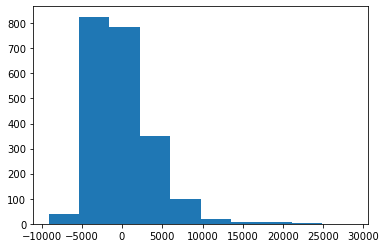

In [30]:
plt.hist(residuals)

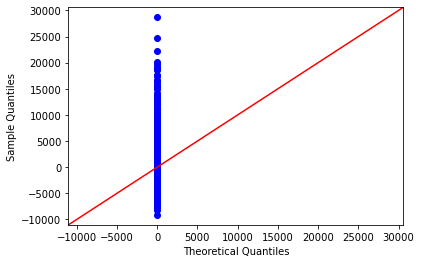

In [31]:
import numpy as np 
import statsmodels.api as sm 
import pylab as py

sm.qqplot(residuals, line ='45') 
py.show()

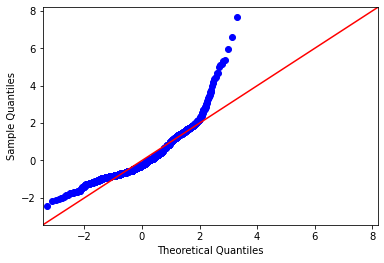

In [32]:
import numpy as np 
import statsmodels.api as sm 
import pylab as py

sm.qqplot(residuals,fit = True, line ='45') 
py.show()

In [33]:
from scipy import stats
resids = results.resid
stats.kstest(resids,"norm")

KstestResult(statistic=0.5385053480725855, pvalue=0.0)

In [34]:
# from scipy import stats
# resids = results.resid
# stats.kstest(resids,"t")

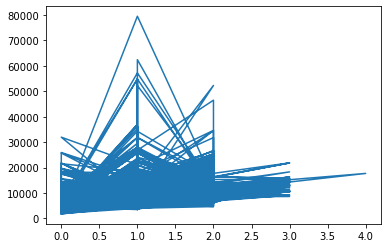

In [35]:
plt.plot(Data_df["Total_Stops"],Data_df["Price"])

In [36]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)
y_pred = reg_rf.predict(X_test)
print(reg_rf.score(X_train, y_train))

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9562746451474319


In [37]:
reg_rf.score(X_test, y_test)

0.8012848013653011

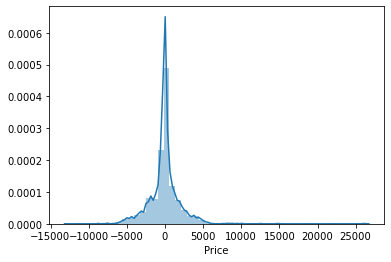

In [38]:
import seaborn as sns
sns.distplot(y_test-y_pred)
plt.show()

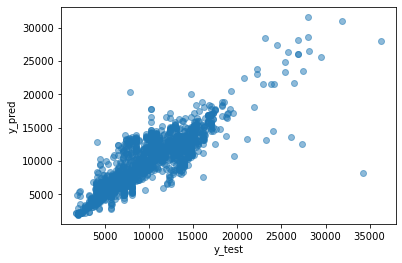

In [39]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [40]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1202.8941558908386
MSE: 3918830.3106813054
RMSE: 1979.6035741231892


In [41]:

metrics.r2_score(y_test, y_pred)

0.8012848013653011

In [24]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [25]:

# Create the random grid
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [38]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [39]:
rf_random.fit(X,y)

ValueError: Found input variables with inconsistent numbers of samples: [10000, 10682]

In [36]:
rf_random.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [47]:
prediction = rf_random.predict(X_test)

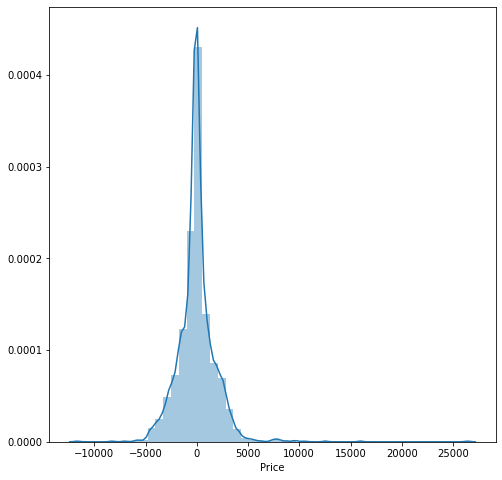

In [48]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

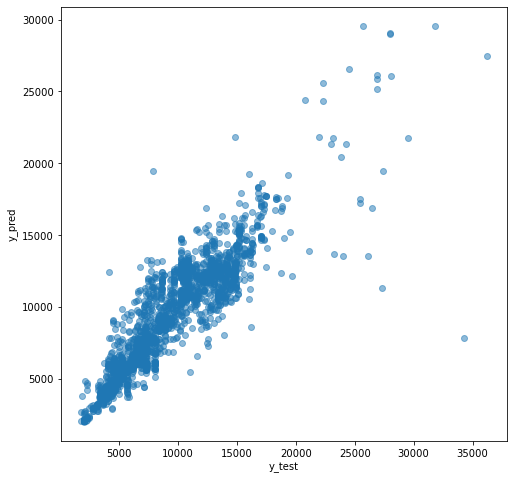

In [49]:

plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [50]:

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1201.3792998774854
MSE: 3538379.546012319
RMSE: 1881.0580921418455


In [51]:
metrics.r2_score(y_test, prediction)

0.820576616340259

In [28]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [29]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [58]:
y_prediction = forest.predict()

In [65]:
# metrics.r2_score(y_test, y_prediction)

In [56]:
X_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'dep_time_hour',
       'arr_time_hour', 'S_Banglore', 'S_Chennai', 'S_Delhi', 'S_Kolkata',
       'S_Mumbai', 'D_Banglore', 'D_Cochin', 'D_Hyderabad', 'D_Kolkata',
       'D_New Delhi', 'A_Air Asia', 'A_Air India', 'A_GoAir', 'A_IndiGo',
       'A_Jet Airways', 'A_Jet Airways Business', 'A_SpiceJet', 'A_Trujet',
       'A_Vistara'],
      dtype='object')

In [97]:
X.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'dep_time_hour',
       'arr_time_hour', 'Duration_hour', 'S_Banglore', 'S_Chennai', 'S_Delhi',
       'S_Kolkata', 'S_Mumbai', 'D_Banglore', 'D_Cochin', 'D_Hyderabad',
       'D_Kolkata', 'D_New Delhi', 'A_Air Asia', 'A_Air India', 'A_GoAir',
       'A_IndiGo', 'A_Jet Airways', 'A_Jet Airways Business',
       'A_Multiple carriers', 'A_Multiple carriers Premium economy',
       'A_SpiceJet', 'A_Trujet', 'A_Vistara', 'A_Vistara Premium economy'],
      dtype='object')